# Replication data and code for: "From Programming to Products: Softalk Magazine and the Rise of the Personal Computer User"

Nooney, Laine, Kevin Driscoll, and Kera Allen. “From Programming to Products: Softalk Magazine and the Rise of the Personal Computer User.” Information & Culture 55, no. 2 (June 18, 2020): 105–29. https://muse.jhu.edu/article/757558

# Set up environment

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
# Set my pandas display preferences
pd.set_eng_float_format(accuracy=2, use_eng_prefix=False)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Set display font to: 
# Roboto, by Christian Robertson
# https://fonts.google.com/specimen/Roboto
rcParams['font.sans-serif'] = 'Roboto'

In [5]:
import seaborn as sns

# Read data 

## Letters

In [6]:
datafn = "softalk_letters.1980-11_to_1984-08.tsv"

In [7]:
df = pd.read_csv(datafn,
                 sep="\t",
                 header=0,
                 index_col=0,
                )

In [8]:
# Useful to have a duplicate of the index column 
# for aggregating and grouping data
df = df.reset_index().set_index("full_letter_code", drop=False)

In [9]:
df.head()

,full_letter_code,month,year,volume,issue,page,author_id,name,title,affiliation,...,Security or Encryption,Softporn or Erotic Software,Software Distributor or Distribution,Store or Retailers,Subscription Issues,Technical tip or howto,Voice Recognition,Warranties,Word Processing,Work or professional life
full_letter_code,,,,,,,,,,,,,,,,,,,,,
1980.11.01,1980.11.01,11,1980,1,3,10,0,Mark J. Conradt,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
1980.11.02,1980.11.02,11,1980,1,3,10,1,Pete Helfrich,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1980.11.03,1980.11.03,11,1980,1,3,10,2,G. C. Best,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1980.11.04,1980.11.04,11,1980,1,3,10,3,Larry Chisausky,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1980.11.05,1980.11.05,11,1980,1,3,10,4,Lynn Schechter,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# Check that we imported the correct data
assert df.shape == (1285, 73)

In [11]:
# Expecting 1,285 letters
num_letters = df.shape[0]
print("Letters in the corpus: {:,}".format(num_letters))

Letters in the corpus: 1,285


In [12]:
# Expecting 1,163 authors
num_authors = len(df.author_id.unique())
print("Unique authors: {:,}".format(num_authors))

Unique authors: 1,163


## Page counts for Softalk

In [13]:
page_count_fn = 'softalk_page_count.1980-1984.tsv'

In [14]:
page_count_df = pd.read_csv(page_count_fn, sep='\t')

In [15]:
page_count_df.sort_values(by=['Year','Month'], inplace=True)

In [16]:
# Check that we have a page count for all 48 issues
assert page_count_df.shape == (48, 5)

In [17]:
page_count_df.head()

,Volume,Issue,Month,Year,Pages
0,1,1,9,1980,28
1,1,2,10,1980,28
2,1,3,11,1980,44
3,1,4,12,1980,36
4,1,5,1,1981,36


## Letter and page counts for other magazines

In [18]:
comp_page_count_fn = "letters_pages.1980-1982.tsv"

In [19]:
comp_pages_df = pd.read_csv(comp_page_count_fn,
                            sep='\t',
                            header=0,
                            parse_dates=['date'],
                            infer_datetime_format=True)

In [20]:
assert comp_pages_df.shape == (75, 5)

In [21]:
comp_pages_df.head()

,date,publication,letter_count,page_count,ratio
0,1980-09-01,Byte,10.00,400,0.03
1,1980-10-01,Byte,14.00,400,0.04
2,1980-11-01,Byte,9.00,432,0.02
3,1980-12-01,Byte,11.00,400,0.03
4,1981-01-01,Byte,8.00,384,0.02


# Figure 5: Relative growth of Softalk and Open Discussion, 1980–84.

## Combine page counts with letter counts

In [22]:
def combine_volume_issue(s): 
    return 'v{:02d}-i{:02d}'.format(s['volume'], s['issue'])

In [23]:
magazine_gb = df.assign(magazine = df.apply(combine_volume_issue, axis=1)) \
                  .groupby('magazine')

In [24]:
# One-time function because the column names are capitalized
def f(s):
    return 'v{:02d}-i{:02d}'.format(s['Volume'], s['Issue'])

In [25]:
issue_df = page_count_df.assign(magazine=page_count_df.apply(f, axis=1)) \
             .set_index('magazine') \
             .assign(Letters=magazine_gb.month.count()) \
             .fillna(0.0)

In [26]:
issue_df.head()

,Volume,Issue,Month,Year,Pages,Letters
magazine,,,,,,
v01-i01,1,1,9,1980,28,0.00
v01-i02,1,2,10,1980,28,0.00
v01-i03,1,3,11,1980,44,20.00
v01-i04,1,4,12,1980,36,15.00
v01-i05,1,5,1,1981,36,11.00


## Descriptive statistics for page and letter counts

In [27]:
# Descriptive statistics on per-issue page and letter counts
issue_df.loc[:, ["Pages", "Letters"]].describe()

,Pages,Letters
count,48.00,48.00
mean,193.83,26.77
std,99.24,13.17
min,28.00,0.00
25%,110.00,14.75
50%,208.00,30.00
75%,272.00,36.00
max,416.00,57.00


In [28]:
# Mean pages and letters per Volume
issue_df.groupby("Volume").agg("mean").loc[:,["Pages", "Letters"]]

,Pages,Letters
Volume,,
1,55.33,10.58
2,188.83,26.42
3,278.83,35.50
4,252.33,34.58


## Calculate relative growth for pages and letters

For an introduction to time series and indices in an historical context, see:
- Hudson, Pat. History by Numbers: An Introduction to Quantitative Approaches. London; New York: Arnold ; Co-published in the U.S.A. by Oxford University Press, 2000. https://www.bloomsbury.com/uk/history-by-numbers-9781474294157/

In [29]:
pages_growth = issue_df.groupby('Volume').sum().Pages / \
               issue_df.groupby('Volume').sum().Pages.iloc[0]

In [30]:
letters_growth = issue_df.groupby('Volume').sum().Letters / \
                 issue_df.groupby('Volume').sum().Letters.iloc[0]

In [31]:
growth_df = pd.concat([pages_growth, letters_growth], axis=1)

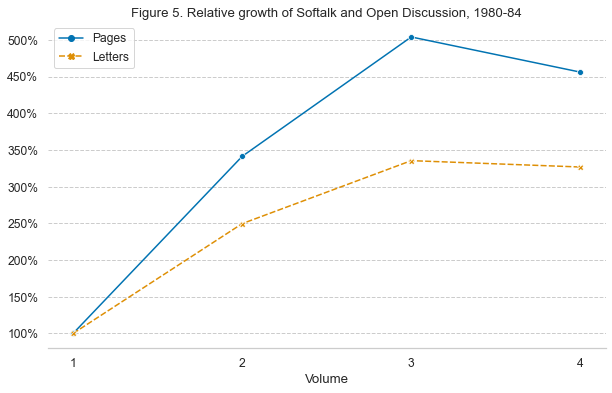

In [32]:
sns.set_context('notebook', font_scale=1.1)
sns.set_palette('colorblind')
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

sns.lineplot(data=growth_df, markers=True, ax=ax)

# We need to explicitly set the ticks and labels, see:
# https://github.com/matplotlib/matplotlib/issues/18848

xticks = np.arange(1,5)
ax.set_xticks(xticks)
ax.set_xticklabels(str(tick) for tick in xticks)

ymax = growth_df.max().max()
yticks = np.arange(1.0, ymax, 0.5)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:,.0%}'.format(tick) for tick in yticks])

title = "Figure 5. Relative growth of Softalk and Open Discussion, 1980-84"
ax.set_title(title)

ax.yaxis.grid(which="major", linestyle="--")
ax.xaxis.grid(False)
sns.despine(fig, left=True)

# fn = '05-softalk_growth.eps'
# fig.savefig(fn, dpi=800, format='eps', bbox_inches='tight')

# fn = '05-softalk_growth.tiff'
# fig.savefig(fn, dpi=300, format='tiff', bbox_inches='tight')

# Figure 6. Reader letters published in _Byte_, _Creative Computing_, and _Softalk_, 1980–82

We created this data by hand using the Internet Archive's collection of computer magazines: 
- https://archive.org/details/computermagazines

In [33]:
magazine_comparison_df = \
pd.concat([comp_pages_df.loc[comp_pages_df.publication.eq("Byte")].pivot_table(index='date', values=["page_count", "letter_count"]),
           comp_pages_df.loc[comp_pages_df.publication.eq("Creative Computing")].pivot_table(index='date', values=["page_count", "letter_count"]),
           comp_pages_df.loc[comp_pages_df.publication.eq("Softalk")].pivot_table(index='date', values=["page_count", "letter_count"])], 
          keys=['Byte', 'Creative Computing', 'Softalk'],
          axis=1)

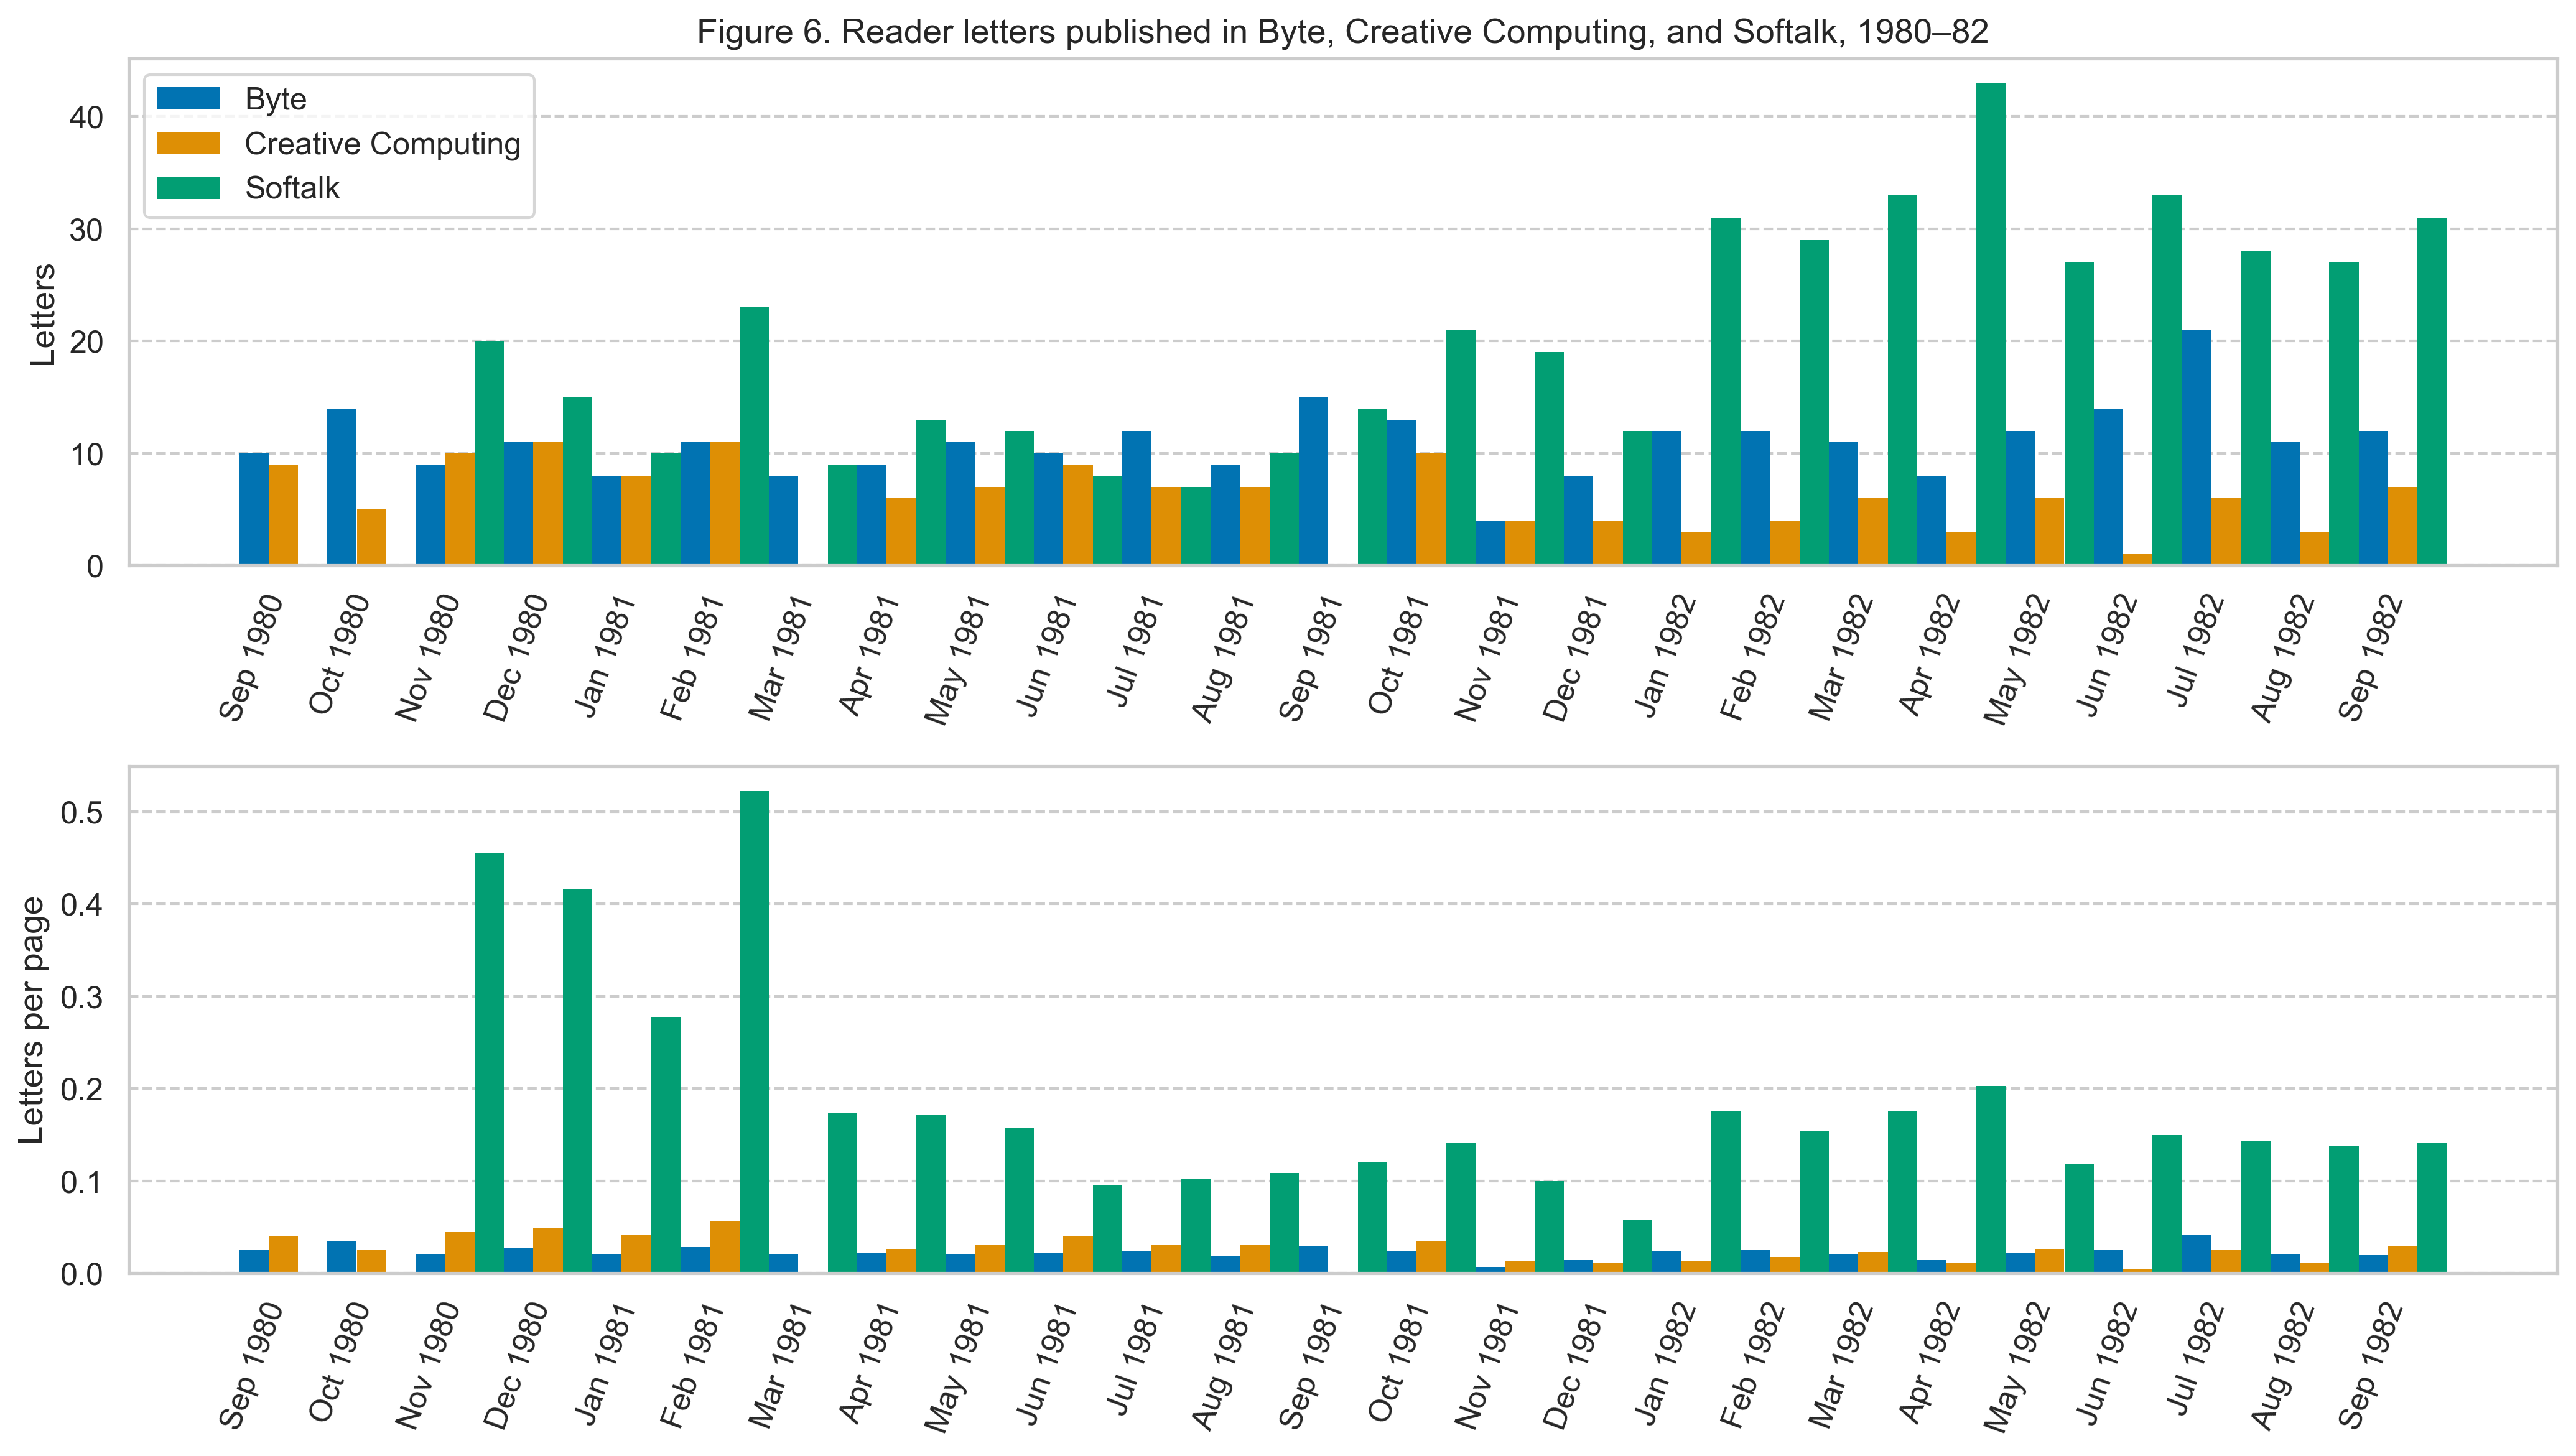

In [34]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('notebook', font_scale=1.1)

fig = plt.figure(figsize=(14,8), dpi=300)
ax = fig.add_subplot(211)

xticklabels = magazine_comparison_df.index.strftime('%b %Y')
x = np.arange(magazine_comparison_df.shape[0])

for offset, publication in enumerate(('Byte', 'Creative Computing', 'Softalk')):
    y = magazine_comparison_df[publication].letter_count
    ax.bar(x + (offset/3.0), y, width=0.333, label=publication, linewidth=0)

ax.set_xticks(x)
ax.set_xticklabels(xticklabels, rotation=70)

ax.set_ylabel("Letters")
ax.set_title('Figure 6. Reader letters published in Byte, Creative Computing, and Softalk, 1980–82')
ax.legend(loc='upper left')

ax.xaxis.grid(False)
ax.yaxis.grid(linestyle='--')

ax = fig.add_subplot(212)

xticklabels = magazine_comparison_df.index.strftime('%b %Y')
x = np.arange(magazine_comparison_df.shape[0])

for offset, publication in enumerate(('Byte', 'Creative Computing', 'Softalk')):
    y = magazine_comparison_df[publication].letter_count / magazine_comparison_df[publication].page_count 
    # color
    ax.bar(x + (offset/3.0), y, width=0.333, label=publication, linewidth=0)

ax.set_xticks(x)
ax.set_xticklabels(xticklabels, rotation=70)

ax.set_ylabel("Letters per page")

ax.xaxis.grid(False)
ax.yaxis.grid(linestyle='--')

fig.tight_layout()

#fn = '06_letters_per_month.eps'
#fig.savefig(fn, dpi=800, format='eps', bbox_inches='tight')

#fn = '06_letters_per_month.tiff'
#fig.savefig(fn, dpi=300, format='tiff', bbox_inches='tight')

# Figure 7. Gender of Softalk writers, 1980-84

We used the open-source “gender-guesser” Python package as a second heuristic for inferring the genders of _Softalk_ letter writers. In comparison to other gender-inference software, gender-guesser performs especially well on names of European origin, which include a majority of the authors published in _Softalk_. We did not use automated gender inference as a replacement  for  but  rather  as  a  complement  to  human  judgment.  See:
- Israel  Saeta  Pérez,  Gender-Guesser: Get the Gender from First Name, version 0.4.0, 2016, https://github.com/lead-ratings/gender-guesser/
- Lucía Santamaría and Helena Mihaljević, “Comparison and Benchmark of Name-to-Gender Inference Services,” PeerJ Computer Science, July 16, 2008, e156. https://doi.org/10.7717/peerj-cs.156

In [35]:
gender_proportion_authors = \
df.drop_duplicates('author_id') \
  .groupby('gender') \
  .month.count() \
  .div(df.drop_duplicates('author_id').shape[0]) \
  .sort_values(ascending=False)

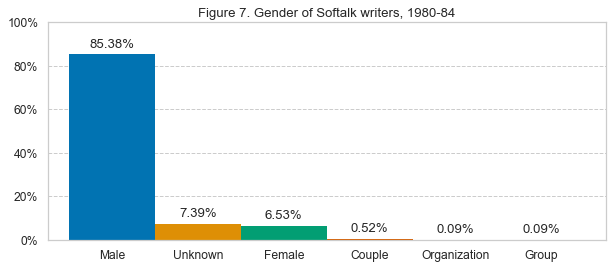

In [36]:
ax = gender_proportion_authors.plot(kind='bar', 
                                    width=1.0, 
                                    figsize=(10,4), 
                                    linewidth=0,
                                    color=sns.color_palette("colorblind"))

for x, prop in enumerate(gender_proportion_authors):
    y = prop + 0.03
    text = '{:2.2%}'.format(prop)
    ax.text(x, y, text, horizontalalignment='center')

ax.set_ybound(lower=0.0, upper=1.0)

ax.set_yticks(np.arange(0,1.2,.2))
ylabels = ['{:0.0%}'.format(t) for t in ax.get_yticks()]
ax.set_yticklabels(ylabels)

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0)
ax.set_xlabel(None)

ax.xaxis.grid(False)
ax.yaxis.grid(linestyle='--')

ax.set_title('Figure 7. Gender of Softalk writers, 1980-84')

fig = ax.get_figure()

#fn = '07-softalk_gender_proportion_of_authors.tiff'
#fig.savefig(fn, dpi=300, format='tiff', bbox_inches='tight')

#fn = '07-softalk_gender_proportion_of_authors.eps'
#fig.savefig(fn, dpi=800, format='eps', bbox_inches='tight')

# Figure 8. Gender of Softalk letter writers by issue, 1980–84

In [37]:
gender_by_issue = \
df.assign(magazine = df.apply(combine_volume_issue, axis=1)) \
  .loc[:, ["full_letter_code","magazine","gender"]] \
  .rename({"full_letter_code": "letter_count"}, axis=1) \
  .groupby(['magazine', 'gender']).count() \
  .unstack(-1).fillna(0.0)

In [38]:
# https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns
gender_by_issue.columns = gender_by_issue.columns.get_level_values(1)

In [39]:
gender_proportion_per_issue = gender_by_issue.div(gender_by_issue.sum(axis=1), axis=0).fillna(0.0)

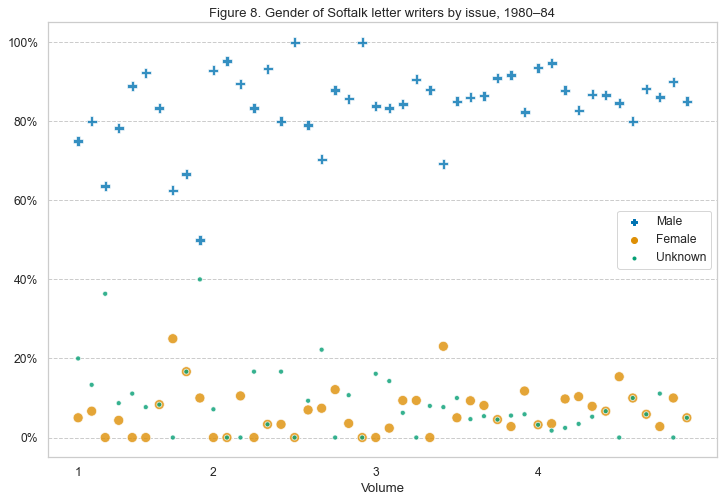

In [40]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('notebook', font_scale=1.1)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

cols = ["Male", "Female", "Unknown", "Couple", "Group", "Organization"]
sns.scatterplot(data=gender_proportion_per_issue.loc[:, cols[:3]], 
                markers=['P','o','.'],
                alpha=0.8, s=100, 
                ax=ax)

ax.set_xticks([0, 10, 22, 34])
ax.set_xticklabels(np.arange(1,5))
ax.set_xlabel("Volume")

ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_yticklabels("{:.0%}".format(tick) for tick in ax.get_yticks())
ax.legend(loc="center right")
ax.set_title("Figure 8. Gender of Softalk letter writers by issue, 1980–84")

ax.xaxis.grid(False)
ax.yaxis.grid(linestyle='--')

#fn = "08-softalk-proportion-gender-by-issue.tiff"
#fig.savefig(fn, dpi=300, format='tiff', bbox_inches='tight')

#fn = "08-softalk-proportion-gender-by-issue.eps"
#fig.savefig(fn, dpi=800, format='eps', bbox_inches='tight')

# Figure 9. Letters published in Softalk per capita by state

State population data clipped from:
- "Intercensal Estimates of the Total Resident Population of States: 1980 to 1990", Population Estimates Branch, U.S. Bureau of the Census, Aug. 1996. https://web.archive.org/web/20160103134806/http://www.census.gov:80/popest/data/state/asrh/1980s/tables/st8090ts.txt

In [41]:
raw_census = """US  226545805 229465714 231664458 233791994 235824902
AL    3893888   3918531   3925266   3934102   3951820
AK     401851    418491    449606    488417    513702
AZ    2718215   2810107   2889861   2968925   3067135
AR    2286435   2293201   2294257   2305761   2319768
CA   23667902  24285933  24820009  25360026  25844393
CO    2889964   2977898   3061564   3133630   3169992
CT    3107576   3128836   3139013   3162354   3180014
DE     594338    595975    599148    605458    611565
DC     638333    636893    634174    632433    633382
FL    9746324  10192774  10471407  10749851  11039925
GA    5463105   5568345   5649792   5728250   5834954
HI     964691    978195    993780   1012717   1027922
ID     943935    962204    973721    981869    990839
IL   11426518  11443458  11423412  11408818  11412132
IN    5490224   5480435   5467922   5450395   5458322
IA    2913808   2907983   2888189   2870543   2858618
KS    2363679   2384849   2401202   2415531   2424086
KY    3660777   3670394   3683445   3694484   3695453
LA    4205900   4283303   4352608   4395316   4400477
ME    1124660   1133033   1136684   1144772   1155635
MD    4216975   4261905   4282923   4313327   4365243
MA    5737037   5768685   5771222   5799407   5840773
MI    9262078   9209287   9115198   9047754   9049452
MN    4075970   4111728   4131450   4141456   4157706
MS    2520638   2539036   2556777   2567717   2578051
MO    4916686   4932064   4929451   4943733   4975278
MT     786690    795328    803986    814031    820905
NE    1569825   1578515   1581780   1584293   1588639
NV     800493    847655    881537    901977    924922
NH     920610    936621    947719    958134    976864
NJ    7364823   7407472   7430968   7467785   7515473
NM    1302894   1332748   1363823   1394361   1416717
NY   17558072  17567734  17589738  17686905  17745684
NC    5881766   5956653   6019101   6077056   6164006
ND     652717    659505    668972    676688    680497
OH   10797630  10788330  10757087  10737632  10737746
OK    3025290   3096164   3206123   3290402   3285533
OR    2633105   2667982   2664922   2653066   2666588
PA   11863895  11858567  11845146  11837723  11815172
RI     947154    953013    954170    956382    961894
SC    3121820   3179255   3207614   3234066   3271868
SD     690768    689584    690597    693008    697249
TN    4591120   4627658   4646041   4659749   4686737
TX   14229191  14746318  15331415  15751676  16007086
UT    1461037   1515471   1558314   1594943   1622342
VT     511456    515594    519109    523302    526660
VA    5346818   5444097   5492783   5564657   5643870
WA    4132156   4235731   4276552   4300266   4343656
WV    1949644   1954124   1949604   1945061   1927697
WI    4705767   4726343   4728870   4721438   4735563
WY     469557    491712    506400    510345    504896"""

In [42]:
state_population = {}
for row in raw_census.split('\n'):
    data = row.split()
    state_population[data[0]] = {"4/80": float(data[1]),
                                "7/81": float(data[2]),
                                "7/82": float(data[3]),
                                "7/83": float(data[4]),
                                "7/84": float(data[5])}
us_population = state_population["US"]
del(state_population["US"])

In [43]:
state_population = pd.DataFrame(state_population).T

In [44]:
state_freq = pd.DataFrame(df.loc[(df.country=='USA') | (df.country=='Puerto Rico')].groupby('state').state.count())

In [45]:
state_freq.rename({"state": "freq"}, axis=1, inplace=True)

In [46]:
# Calculate the proportion of all letters originating in each state
state_freq = state_freq.assign(proportion=state_freq.freq / state_freq.freq.sum())

In [47]:
# States ranked by frequency of letters published in Softalk
state_freq.sort_values('freq', ascending=False).head(10)

,freq,proportion
state,,
CA,353,0.29
NY,91,0.07
TX,69,0.06
IL,61,0.05
NJ,43,0.03
MI,35,0.03
FL,35,0.03
OH,33,0.03
MA,32,0.03


In [48]:
# Dropping PR because it's not in the Census table 
# Joining state population data from July 1984
states = state_freq.drop('PR') \
                   .join(state_population.loc[:,'7/84']) \
                   .rename({'7/84': 'population'}, axis=1)

In [49]:
states.loc[:, "per_capita"] = states.freq / states.population

In [50]:
states.loc[:, "per_500k"] = states.freq / states.population * 500000

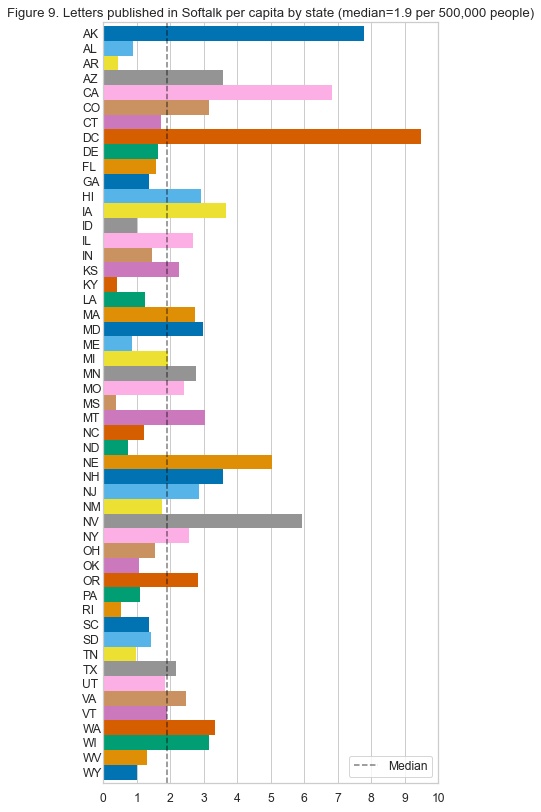

In [51]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('notebook', font_scale=1.1)

# Plotting alphabetical by two-letter state postal codes
# to make it easier for readers to locate particular states
ax = states.per_500k.sort_index(ascending=False) \
           .plot(kind='barh', 
                 width=1.0, 
                 linewidth=0.0,
                 color=sns.color_palette("colorblind"),
                 figsize=(6,14), label="_nolegend_")

ymin, ymax = ax.get_ybound()
ax.vlines(x=states.per_500k.median(), ymin=ymin, ymax=ymax,
             alpha=0.5, linestyle='--',
             color='black', label="Median")
ax.legend(loc="lower right")

ax.set_ylabel(None)

title = "Figure 9. Letters published in Softalk per capita by state (median={:.2} per 500,000 people)".format(states.per_500k.median())
ax.set_title(title)

ax.set_xbound(0.0, 10.0)
ax.set_xticks(np.arange(0.0, 11.0, 1.0))

ax.set_yticklabels(labels=ax.get_yticklabels(), horizontalalignment="left")
ax.yaxis.set_tick_params(pad=15)

ax.grid(axis='y')

#fig = ax.get_figure()
#fn = "09-softalk-letters-per-500k-people.tiff"
#fig.savefig(fn, dpi=300, format='tiff', bbox_inches='tight')
#fn = "09-softalk-letters-per-500k-people.eps"
#fig.savefig(fn, dpi=800, format='eps', bbox_inches='tight')

# Figure 10. Replies to letters published in Softalk, 1980–84

In [52]:
editors_reply_idx = df.editors_reply.eq(1)
in_reply_to_idx = df.in_reply_to.notnull()

In [53]:
interaction_df = df.loc[editors_reply_idx | in_reply_to_idx]

In [54]:
interaction_by_volume_df = \
interaction_df.loc[:, ["volume", 
                       "full_letter_code", 
                       "in_reply_to", 
                       "editors_reply"]] \
              .groupby("volume") \
              .agg({"full_letter_code": "count",
                    "in_reply_to": "count", 
                    "editors_reply": "sum"})

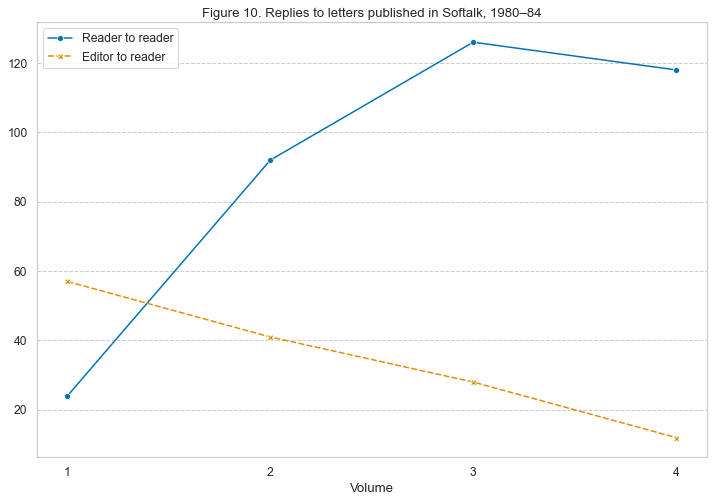

In [55]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('notebook', font_scale=1.1)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

plotdata = interaction_by_volume_df.loc[:, ["in_reply_to", "editors_reply"]]
sns.lineplot(data=plotdata, markers=True, ax=ax)
ax.set_xticks(np.linspace(1, 4, 4))

ax.set_xlabel(ax.get_xlabel().capitalize())
ax.legend(["Reader to reader", "Editor to reader"])
ax.set_title("Figure 10. Replies to letters published in Softalk, 1980–84")

ax.xaxis.grid(False)
ax.yaxis.grid(linestyle='--')

#fn = '10-softalk_interactions.tiff'
#fig.savefig(fn, dpi=300, format='tiff', bbox_inches='tight')
#fn = '10-softalk_interactions.eps'
#fig.savefig(fn, dpi=800, format='eps', bbox_inches='tight')

# Figure 11. Types of letters published in Open Discussion, 1980–84

## Combine themes into categories

In [56]:
themes_softalk = ["Contest", 
                  "Subscription Issues",
                  "Correction to an article",
                  "Request to Softalk Editors",
                  "Criticism of Softalk",
                  "Praise for Softalk"]

In [57]:
df.loc[:, "About Softalk"] = \
df.loc[:, themes_softalk].sum(axis=1).gt(0).astype(int)

In [58]:
themes_genre =  ["Announcement for Softalk readers",
                "Technical tip or howto",
                "Request for help or assistance or advice",
                "Product or service recommendation or warning",
                "Commentary or opinion"]

In [59]:
themes_industry = ["Royalties",
                        "Warranties",
                        "Quality or Accountability Issues",
                        "Mail Order",
                        "Software Distributor or Distribution",
                        "Publishing House",
                        "Copyright",
                        "Store or Retailers"]

In [60]:
df.loc[:, "Industry"] = \
df.loc[:, themes_industry].sum(axis=1).gt(0).astype(int)

In [61]:
themes_applications = ["Printer",
                        "Word Processing",
                        "Voice Recognition",
                        "Genealogy",
                        "Arts and music",
                        "Cooking or Diet",
                        "Ergonomics",
                        "BBS modems telecommunications",
                        "Personal finance",
                        "Databases",
                        "Gaming"]

In [62]:
df.loc[:, "Applications"] = \
df.loc[:, themes_applications].sum(axis=1).gt(0).astype(int)

In [63]:
themes_crosscutting = ["Psychology or Mental Health",
                        "Romance",
                        "Domestic themes",
                        "Gender Themes",
                        "Disability",
                        "Education or Teaching",
                        "HiRes Graphics",
                        "Work or professional life"]

In [64]:
df.loc[:, "Crosscutting"] = \
df.loc[:, themes_crosscutting].sum(axis=1).gt(0).astype(int)

In [65]:
themes_debate = ["Softporn or Erotic Software", 
                 "Piracy"]

In [66]:
df.loc[:, "Debate"] = \
df.loc[:, themes_debate].sum(axis=1).gt(0).astype(int)

In [67]:
themes_metadata = ["Notes their own age",
                    "Identifies as novice",
                    "Family or children or spouse",
                    "Club or user group",
                    "Includes source code"]

In [68]:
df.loc[:, "Metadata"] = \
df.loc[:, themes_metadata].sum(axis=1).gt(0).astype(int)

## Prevalence of various themes (non-exclusive)

In [69]:
letter_types = ["Announcement for Softalk readers",
                "Correction to an article",
                "Request to Softalk Editors",
                "Criticism of Softalk",
                "Praise for Softalk",
                "Technical tip or howto",
                "Request for help or assistance or advice",
                "Product or service recommendation or warning",
                "Commentary or opinion"]

In [70]:
letter_type_freq = \
pd.concat([df.loc[:, letter_types].sum(axis=0),
           df.loc[:, letter_types].sum(axis=0).div(num_letters)],
          axis=1) \
  .rename({0: 'frequency', 1: 'percent'}, axis=1) \
  .sort_values('frequency')

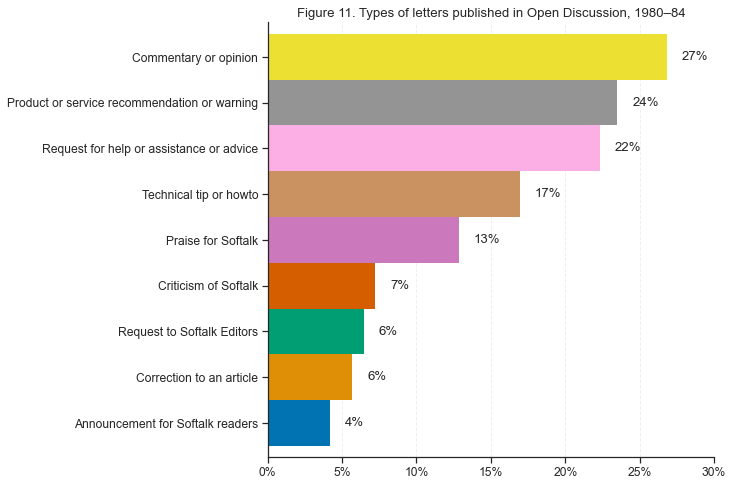

In [71]:
sns.set_style('ticks')
sns.set_palette('colorblind')
sns.set_context('notebook', font_scale=1.1)

ax = letter_type_freq.percent.plot(kind='barh', 
                                   width=1.0, 
                                   linewidth=0.0,
                                   figsize=(8,8),
                                   color=sns.color_palette("colorblind"))

for y, pct in enumerate(letter_type_freq.percent):
    x = pct + .01
    text = '{:.0%}'.format(pct)
    ax.text(x, y, text, verticalalignment='center')
    
title = "Figure 11. Types of letters published in Open Discussion, 1980–84"
ax.set_title(title)

ax.set_ylabel('')

xbound = 0.3
major_ticks = np.arange(0,xbound+0.05,.05)
ax.set_xbound(upper=xbound)
ax.set_xticks(major_ticks)
ax.set_xticklabels("{:.0%}".format(l) for l in major_ticks)

ax.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()

#fig = ax.get_figure()
#fn = '11-softalk_letter_type_freq.tiff'
#fig.savefig(fn, dpi=300, format='tiff', bbox_inches='tight')
#fn = '11-softalk_letter_type_freq.eps'
#fig.savefig(fn, dpi=800, format='eps', bbox_inches='tight')

# Figure 12. Relative proportions of major themes in Open Discussion, six-month samples, 1980–84

In [72]:
df.loc[:, "datetime"] = \
pd.to_datetime(df.assign(day=1).loc[:, ["year", "month", "day"]])

In [73]:
big_themes = ["About Softalk",
             "Applications",
             "Debate",
             "Industry",
             "Programming"]
big_themes += themes_genre

In [74]:
period = '6M'

ts = \
pd.concat([df.loc[:, ["datetime"]+big_themes].groupby("datetime").sum(),
           df.loc[:, ["datetime", "full_letter_code"]].groupby("datetime").count()], axis=1) \
  .rename({"full_letter_code": "letter_count",
           "Technical tip or howto": "Tech Tips",
           "Product or service recommendation or warning": "Products & Services",
           "Request for help or assistance or advice": "Request for Help"}, axis=1) \
  .resample(period, closed='left', label='right').sum()

In [75]:
# Check that we're including the whole dataset
assert ts.letter_count.sum() == num_letters

In [76]:
relative_ts = \
ts.iloc[:, :-1].div(ts.letter_count, axis=0)

In [77]:
# Preview data for manual check
relative_ts.T

datetime,1981-04-30,1981-10-31,1982-04-30,1982-10-31,1983-04-30,1983-10-31,1984-04-30,1984-10-31
About Softalk,0.78,0.42,0.36,0.24,0.25,0.17,0.18,0.14
Applications,0.09,0.15,0.24,0.29,0.21,0.38,0.33,0.33
Debate,0.10,0.03,0.14,0.19,0.04,0.09,0.03,0.00
Industry,0.09,0.08,0.14,0.20,0.14,0.06,0.05,0.03
Programming,0.27,0.32,0.34,0.26,0.16,0.12,0.07,0.12
Announcement for Softalk readers,0.07,0.08,0.07,0.05,0.03,0.02,0.03,0.03
Tech Tips,0.04,0.14,0.19,0.19,0.09,0.21,0.20,0.21
Request for Help,0.13,0.23,0.21,0.20,0.21,0.27,0.22,0.28
Products & Services,0.04,0.10,0.14,0.37,0.30,0.22,0.24,0.29
Commentary or opinion,0.31,0.18,0.24,0.37,0.29,0.27,0.22,0.23


In [78]:
cols = ["Applications",
       "Industry",
       "Programming",
       "Tech Tips", 
       "Products & Services"]
data = relative_ts.loc[:, cols]

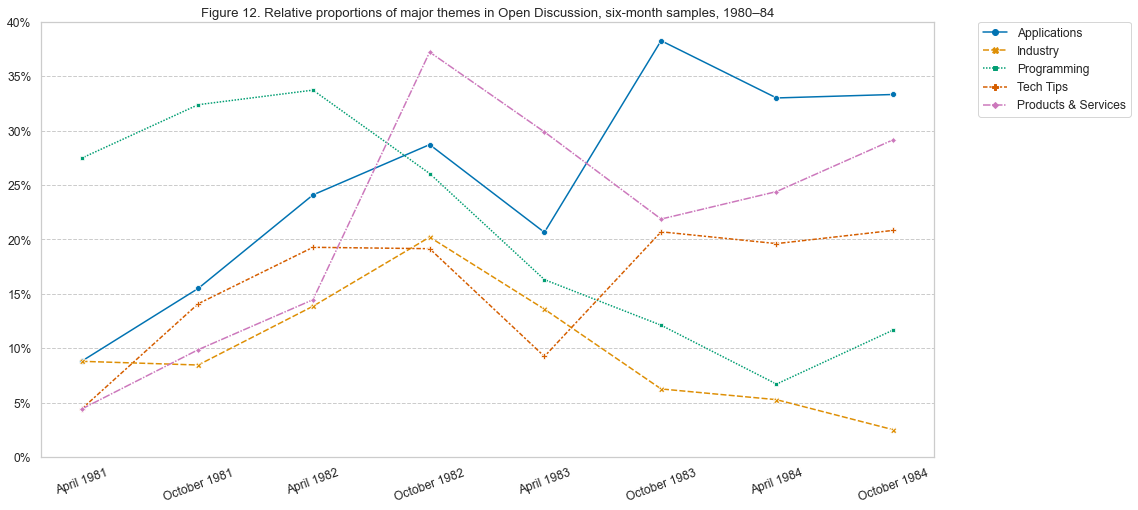

In [79]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('notebook', font_scale=1.1)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

lp = sns.lineplot(data=data, markers=True, ax=ax)

ax.set_ylim(0.0, 0.4)
ymin, ymax = ax.get_ybound()

ax.set_xticks(data.index)
ax.xaxis.grid(False)

ax.yaxis.grid(linestyle='--', )

ax.set_xlabel(None)
ax.tick_params(axis='x', labelrotation=20, )

ax.set_xticklabels(data.index.strftime('%B %Y'), 
                   horizontalalignment='center')

ax.set_yticks(np.arange(0,.45,.05))
ax.set_yticklabels("{:.0%}".format(tick) for tick in ax.get_yticks())

title = "Figure 12. Relative proportions of major themes in Open Discussion, six-month samples, 1980–84"
ax.set_title(title)

legend = ax.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

#fn = './12-softalk-topics-over-time.tiff'
#fig.savefig(fn, dpi=300, format='tiff', bbox_inches='tight')
#fn = './12-softalk-topics-over-time.eps'
#fig.savefig(fn, dpi=800, format='eps', bbox_inches='tight')